In [ ]:
# !pip3 uninstall --yes fbprophet
# !pip3 install fbprophet --no-cache-dir --no-binary :all:
# !pip3 install pydotplus --no-cache-dir --no-binary :all:
# https://rdrr.io/cran/prophet/man/add_seasonality.html

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings("ignore") # Don't want to see the warnings in the notebook
from statsmodels.tsa.stattools import acf



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Accuracy metrics
def forecast_accuracy(y_hat, y):
    mape = np.mean(np.abs(y_hat - y)/np.abs(y))
    mae = np.mean(np.abs(y_hat - y))
    rmse = np.mean((y_hat - y)**2)**.5
    return({'mape':mape, 'mae': mae, 'rmse':rmse})

In [3]:
df = pd.read_csv('Jan29_to_Feb26.csv',index_col=0)
df = df[df.station == "ATHENRY"]


In [4]:
df2 = df[['date', 'avg_wind_pwr']]
df2.columns = ['ds', 'y'] # prophet accepts variables names as ds and y.

from fbprophet import Prophet

P=Prophet(interval_width=0.95, yearly_seasonality=False, weekly_seasonality=True, changepoint_range=1)
P.add_seasonality(name='hourly', period=24, fourier_order=5)

P.fit(df2)
pred = P.predict()


INFO:numexpr.utils:NumExpr defaulting to 2 threads.


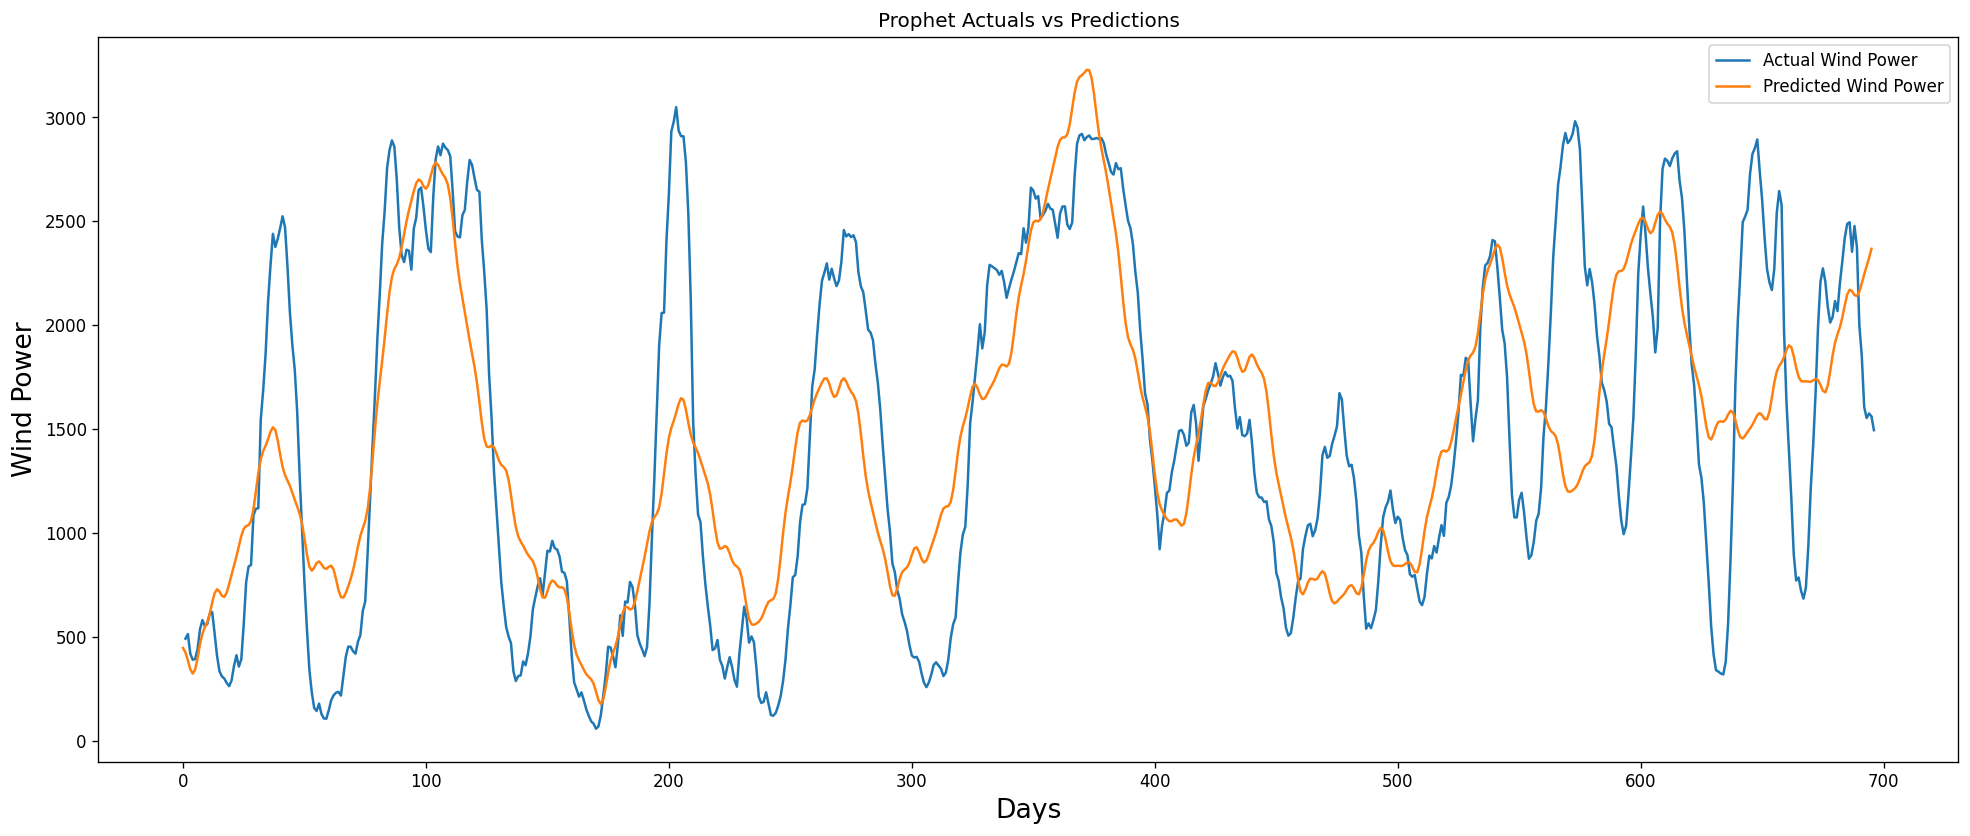

In [5]:
# Actual vs Fitted
# Prophet model predictions.

plt.rcParams.update({'figure.figsize':(20,8), 'figure.dpi':120})

plt.title('Prophet Actuals vs Predictions')
plt.xlabel('Days',fontsize=16)
plt.ylabel('Wind Power', fontsize=16)
plt.plot(df2.y, label= 'Actual Wind Power')
plt.plot(pred.yhat, label= 'Predicted Wind Power')
plt.legend()
plt.show()

In [6]:
forecast_accuracy(df2['y'], pred['yhat'])

{'mae': 440.3363406094119,
 'mape': 0.3481808473374788,
 'rmse': 557.1949741650567}

In [8]:
# Forecasts for 24hrs

df3 =  df[['date', 'avg_wind_pwr']]

# split data into train and test
train = df3[:672]
train.columns = ['ds', 'y']
test = df3[672:]
test.columns = ['ds', 'y']

P=Prophet(interval_width=0.95, yearly_seasonality=False, weekly_seasonality=True, changepoint_range=1)
P.add_seasonality(name='hourly', period=24, fourier_order=5)

P.fit(train)
future = P.make_future_dataframe(freq='h', periods=24)
forecast = P.predict(future)



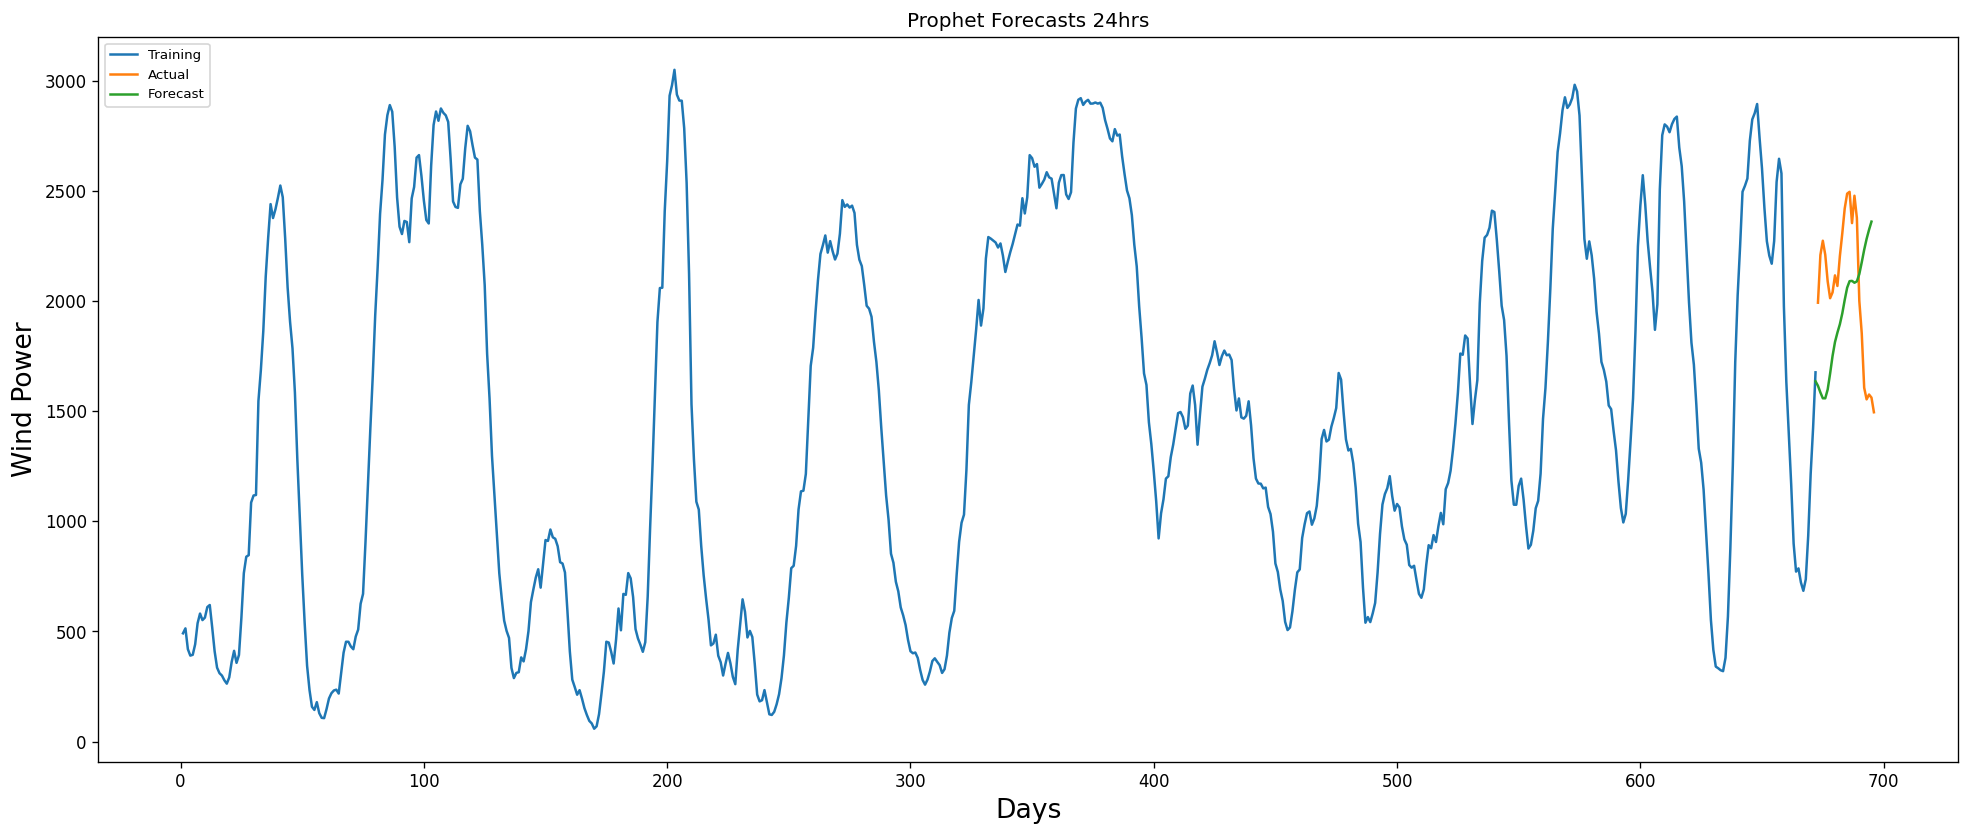

In [9]:
# Forecast Plot
plt.rcParams.update({'figure.figsize':(20,8), 'figure.dpi':120})
plt.title('Prophet Forecasts 24hrs')
plt.xlabel('Days',fontsize=16)
plt.ylabel('Wind Power', fontsize=16)

plt.plot(train.y, label='Training')
plt.plot(test.y, label='Actual')
plt.plot(forecast.yhat[672:], label='Forecast')

plt.legend(loc='upper left', fontsize=8)
plt.show()

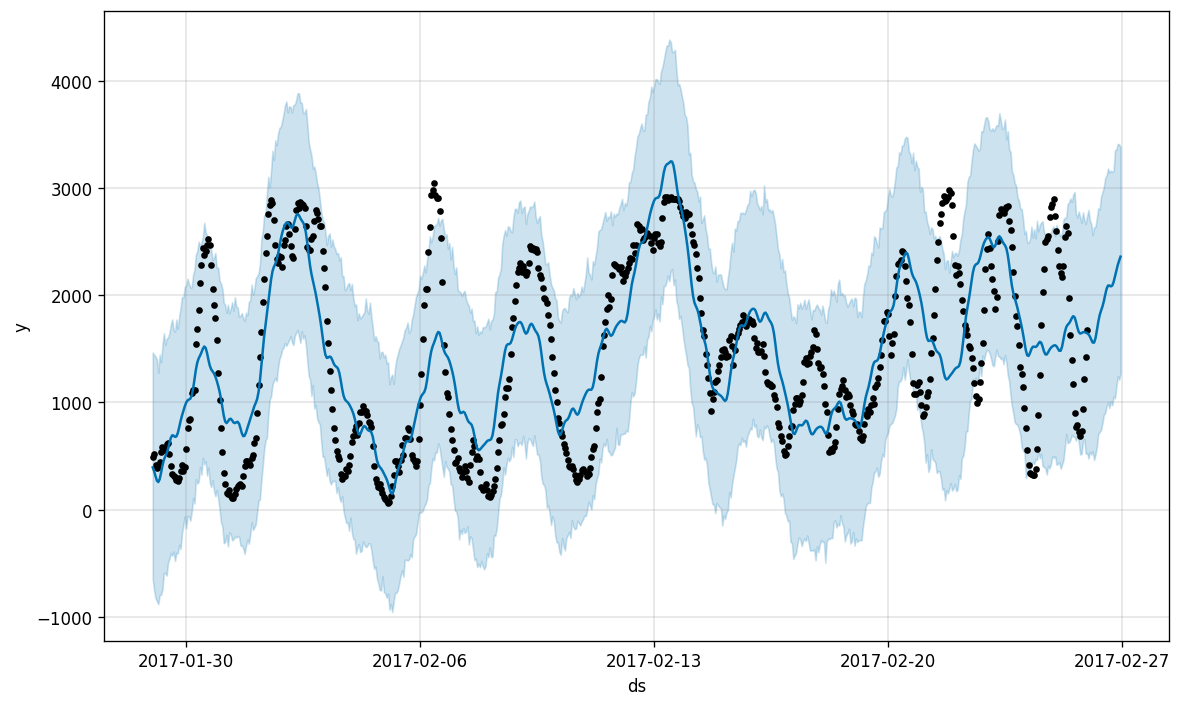

In [10]:
fig = P.plot(forecast) # Prophet plot


In [11]:
forecast_accuracy(forecast.yhat,df3.avg_wind_pwr)

{'mae': 443.68518457917844,
 'mape': 0.5570049069528175,
 'rmse': 558.1648643513724}